<a href="https://colab.research.google.com/github/Nataliahfk/TELECOM-X---PARTE-2/blob/main/TelecomX_SegundaParte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TELECOM X - PARTE 2: Previsión de cancelación en las suscripciones**

##**Descripción del proyecto:**

Desarrollo de modelos predictivos capaces de preveer que clientes tienen mayor probabilidad de cancelar sus suscripciones.

##**Objetivos:**

- Preparar los datos para el modelado (tratamiento, codificación, normalización).
- Realizar análisis de correlación y selección de variables.
- Entrenar dos o más modelos de clasificación.
- Evaluar el rendimiento de los modelos con métricas.
- Interpretar los resultados, incluyendo la importancia de las variables.
- Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

#📊 **Preparar los datos para el modelado**

##1.1. Importando y conociendo los datos

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [116]:
#Importando datos
datos = pd.read_csv('/content/datos_tratados.csv')
datos

,id_cliente,abandono,genero,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargos_mensuales,cargos_totales,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,one year,1,mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,month to month,0,mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,month to month,1,electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,month to month,1,electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,month to month,1,mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,9987-LUTYD,0,Female,0,0,0,13,1,No,DSL,...,No,Yes,No,No,one year,0,mailed check,55.15,742.90,1.838333
7252,9992-RRAMN,1,Male,0,1,0,22,1,Yes,Fiber optic,...,No,No,No,Yes,month to month,1,electronic check,85.10,1873.70,2.836667
7253,9992-UJOEL,0,Male,0,0,0,2,1,No,DSL,...,No,No,No,No,month to month,1,mailed check,50.30,92.75,1.676667
7254,9993-LHIEB,0,Male,0,1,1,67,1,No,DSL,...,Yes,Yes,No,Yes,two year,0,mailed check,67.85,4627.65,2.261667


In [117]:
datos.columns

Index(['id_cliente', 'abandono', 'genero', 'es_ciudadano_senior',
       'tiene_pareja', 'tiene_dependientes', 'meses_en_empresa',
       'servicio_telefonico', 'lineas_multiples', 'tipo_internet',
       'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
       'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
       'tipo_contrato', 'factura_electronica', 'metodo_pago',
       'cargos_mensuales', 'cargos_totales', 'cuentas_diarias'],
      dtype='object')

***Nota**: inicialmente, se eliminarán las varialbes id_cliente ya que esta no aporta poder predictivo debido a que es un simple identificador de cliente, y cuentas_diarias ya que esta variable fue agregada simplemente al dividir cargos_mensuales en 30 días, lo cual resulta redundante y no aporta ningun valor agregado al análisis.*

In [118]:
# Eliminación de Columnas Irrelevantes
datos.drop('id_cliente', axis=1, inplace=True)
datos.drop('cuentas_diarias', axis=1, inplace=True)
datos.head()

,abandono,genero,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,tipo_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargos_mensuales,cargos_totales
0,0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,one year,1,mailed check,65.6,593.30
1,0,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,month to month,0,mailed check,59.9,542.40
2,1,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,month to month,1,electronic check,73.9,280.85
3,1,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,month to month,1,electronic check,98.0,1237.85
4,1,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,month to month,1,mailed check,83.9,267.40


In [119]:
datos.shape[0]

7256

In [120]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   abandono                7256 non-null   int64  
 1   genero                  7256 non-null   object 
 2   es_ciudadano_senior     7256 non-null   int64  
 3   tiene_pareja            7256 non-null   int64  
 4   tiene_dependientes      7256 non-null   int64  
 5   meses_en_empresa        7256 non-null   int64  
 6   servicio_telefonico     7256 non-null   int64  
 7   lineas_multiples        7256 non-null   object 
 8   tipo_internet           7256 non-null   object 
 9   seguridad_online        7256 non-null   object 
 10  respaldo_online         7256 non-null   object 
 11  proteccion_dispositivo  7256 non-null   object 
 12  soporte_tecnico         7256 non-null   object 
 13  tv_streaming            7256 non-null   object 
 14  peliculas_streaming     7256 non-null   

In [121]:
print("\nEstadísticas Variables númericas:")
display(datos.describe())
print("\nEstadísticas variables categóricas:")
display(datos.describe(include='object'))


Estadísticas Variables númericas:


,abandono,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,factura_electronica,cargos_mensuales,cargos_totales
count,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.257580,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213
std,0.437332,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000



Estadísticas variables categóricas:


,genero,lineas_multiples,tipo_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,metodo_pago
count,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256
unique,2,3,3,3,3,3,3,3,3,3,4
top,Male,No,Fiber optic,No,No,No,No,No,No,month to month,electronic check
freq,3669,3490,3198,3607,3181,3194,3581,2895,2866,4005,2445


##Distribución de la variable de respuesta (abandono)

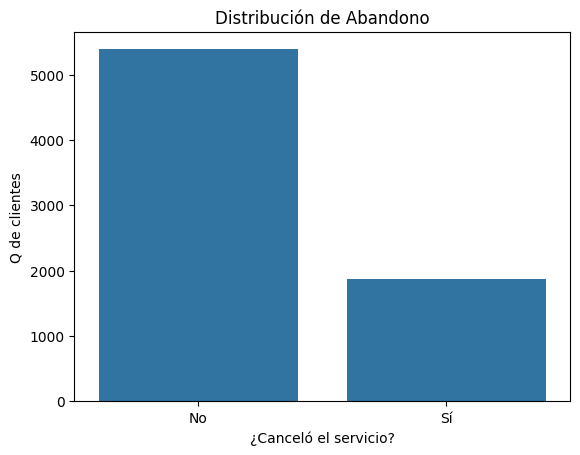

In [122]:
sns.countplot(data=datos, x='abandono')
plt.title('Distribución de Abandono')
plt.xlabel('¿Canceló el servicio?')
plt.ylabel('Q de clientes')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

##1.2. Visualización de las variables categóricas:

- es_ciudadano_senior
- genero
- tiene_pareja
- tiene_dependientes
- servicio_telefonico

In [123]:
datos1 = datos.copy()
datos1

,abandono,genero,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,tipo_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargos_mensuales,cargos_totales
0,0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,one year,1,mailed check,65.60,593.30
1,0,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,month to month,0,mailed check,59.90,542.40
2,1,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,month to month,1,electronic check,73.90,280.85
3,1,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,month to month,1,electronic check,98.00,1237.85
4,1,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,month to month,1,mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0,Female,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,one year,0,mailed check,55.15,742.90
7252,1,Male,0,1,0,22,1,Yes,Fiber optic,No,No,No,No,No,Yes,month to month,1,electronic check,85.10,1873.70
7253,0,Male,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,month to month,1,mailed check,50.30,92.75
7254,0,Male,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,two year,0,mailed check,67.85,4627.65


In [124]:
# Reemplazar valores en la columna usada para la leyenda
datos1['abandono'] = datos1['abandono'].replace({0: 'No', 1: 'Sí'})
# Reemplazar también en X
datos1['es_ciudadano_senior'] = datos1['es_ciudadano_senior'].replace({0: 'No', 1: 'Sí'})

fig = px.histogram(
    datos1,
    x='es_ciudadano_senior',
    text_auto=True,
    color='abandono',
    barmode='group'
)

fig.show()


In [125]:
# Reemplazar valores en la columna usada para la leyenda
datos1['abandono'] = datos1['abandono'].replace({0: 'No', 1: 'Sí'})
# Reemplazar también en X
datos1['genero'] = datos1['genero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
px.histogram(datos1,x='genero',text_auto=True,color='abandono',barmode='group')

In [126]:
# Reemplazar valores en la columna usada para la leyenda
datos1['abandono'] = datos1['abandono'].replace({0: 'No', 1: 'Sí'})
# Reemplazar también en X
datos1['tiene_pareja'] = datos1['tiene_pareja'].replace({0: 'No', 1: 'Sí'})
px.histogram(datos1,x='tiene_pareja',text_auto=True,color='abandono',barmode='group')

In [127]:
# Reemplazar valores en la columna usada para la leyenda
datos1['abandono'] = datos1['abandono'].replace({0: 'No', 1: 'Sí'})
# Reemplazar también en X
datos1['tiene_dependientes'] = datos1['tiene_dependientes'].replace({0: 'No', 1: 'Sí'})
px.histogram(datos1,x='tiene_dependientes',text_auto=True,color='abandono',barmode='group')

In [128]:
# Método crosstab para conocer la relevancia de la variable 'servicio_telefonico' vs abandono
datos1['abandono'] = datos1['abandono'].replace({0: 'No', 1: 'Sí'})
datos1['servicio_telefonico'] = datos1['servicio_telefonico'].replace({0:'No', 1:'Sí'})
pd.crosstab(datos1['servicio_telefonico'], datos1['abandono'], normalize='columns').round(2)*100

abandono,No,Sí
servicio_telefonico,,
No,10.0,9.0
Sí,90.0,91.0


In [129]:
# Reemplazar valores en la columna usada para la leyenda
datos1['abandono'] = datos1['abandono'].replace({0: 'No', 1: 'Sí'})
px.histogram(datos1,x='servicio_telefonico',text_auto=True,color='abandono',barmode='group')

In [130]:
datos

,abandono,genero,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,tipo_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargos_mensuales,cargos_totales
0,0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,one year,1,mailed check,65.60,593.30
1,0,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,month to month,0,mailed check,59.90,542.40
2,1,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,month to month,1,electronic check,73.90,280.85
3,1,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,month to month,1,electronic check,98.00,1237.85
4,1,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,month to month,1,mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0,Female,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,one year,0,mailed check,55.15,742.90
7252,1,Male,0,1,0,22,1,Yes,Fiber optic,No,No,No,No,No,Yes,month to month,1,electronic check,85.10,1873.70
7253,0,Male,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,month to month,1,mailed check,50.30,92.75
7254,0,Male,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,two year,0,mailed check,67.85,4627.65
